In [1]:
import numpy as np
import scipy as sp
import scipy.integrate as spIntegrate
import matplotlib.pyplot as plt

In [2]:
# Infection rate
rr = 0.0005
# Removal/recovery rate
a = 0.5
# Max integration time and max time steps
maxTime = 7.0
maxdt = 0.1
# Initial conditions
t0 = 0     # time
S0 = 10000  # suceptible
I0 = 100    # infected
R0 = 0
x0 = np.array([S0,I0,R0])

In [3]:
# Right hand side of SIR ODE model
def deterministicSIR(t,x):
    S = x[0]
    I = x[1]
    R = x[2]
    y = np.zeros(3)
    y[0] = -rr*S*I
    y[1] = rr*S*I - a*I
    y[2] = a*I
    return y

In [4]:
# scipy Runge-Kutta 4 integrator
integrator = spIntegrate.RK45(deterministicSIR, t0, x0, maxTime, max_step = maxdt)

In [5]:
# integration up until maxTime
arrayTime = []
arrayS = []
arrayI = []
arrayR = []
dSdt = []
dIdt = []
dRdt = []
while integrator.t < maxTime:    
    integrator.step()
    arrayTime.append(integrator.t)
    arrayS.append(integrator.y[0])
    arrayI.append(integrator.y[1])
    arrayR.append(integrator.y[2])
    dydt = deterministicSIR(integrator.t, integrator.y) 
    dSdt.append(dydt[0])
    dIdt.append(dydt[1])
    dRdt.append(dydt[2])

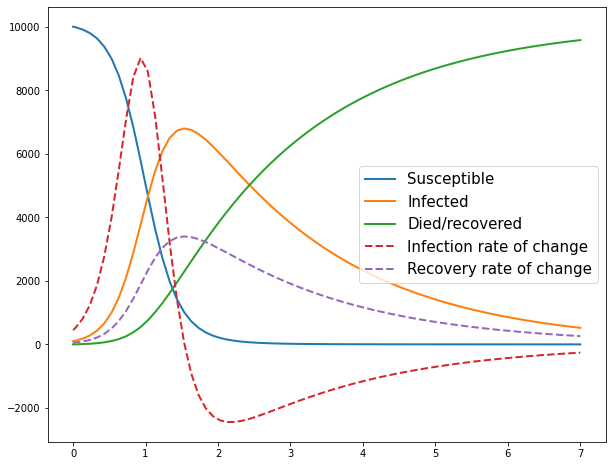

In [23]:
# Plot solution
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(arrayTime, arrayS, lw = 2, label = "Susceptible")
plt.plot(arrayTime, arrayI, lw = 2, label = "Infected")
plt.plot(arrayTime, arrayR, lw = 2, label = "Died/recovered")
plt.plot(arrayTime, dIdt, lw = 2, ls = '--', label = "Infection rate of change")
plt.plot(arrayTime, dRdt, lw = 2, ls = '--', label = "Recovery rate of change")
plt.legend(fontsize = 15)
plt.show()

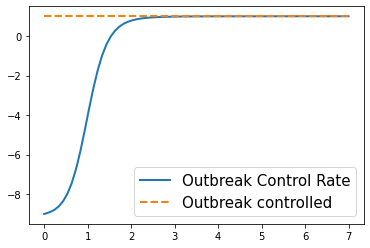

In [24]:
# Plot outbreak control rate
plt.rcParams["figure.figsize"] = (6,4)
outbreakControlRate = -np.array(dIdt)/np.array(dRdt)
plt.plot(arrayTime, outbreakControlRate, lw = 2, label = "Outbreak Control Rate")
plt.plot(arrayTime, np.ones(len(arrayTime)), lw = 2, ls = '--', label = "Outbreak controlled")
plt.legend(fontsize = 15)
plt.show()